In [1]:
path_to_muograph = "../"
import sys
sys.path.insert(1, path_to_muograph)
%reload_ext autoreload
%autoreload 2

![alternative text](../images/muograph_logo.png)


**<h1><center>Tracking: tutorial</center></h1>**

The `Tracking` class is used to **convert muon hits** of the `Hits` class into linear **tracks** usable for **image reconstruction** purposes.

It provides methods to **process data**, compute **angles** and **vizualize** results:

**SUMMARY**:

1. ***Data Handling and Initialization***:
   - *Tracking Initialization*:
     - Tracks are either computed from **Hits** (detector data) or loaded from **files** (HDF5 or DataFrame).


2. ***Track Reconstruction***:
   - *Linear Fit of Hits*:
        - Uses singular value decomposition (SVD) to compute fitted **tracks** and track **points**.
        - **Handles** **large datasets** by processing in chunks.

   - *Zenith Angles*:

       - Calculates the **zenith angle** (theta) and its **projections** in $XZ$ and $YZ$ planes.

3. ***Resolution and efficiency***:
   - *Angular Error*:
        - Measures the **difference** between **generated** and **reconstructed** **zenith angles**.
        - Computes **angular resolution** as the standard deviation of angular error.
    - *Efficiency*:
        - Computes the tracks **efficiency** 

4. ***Visualization***:
   - *Plots for*:
        - Muon features like **zenith angles** and **energy**.
        - **Angular error** distributions.
        - Individual fitted muon **tracks** (e.g., hits and tracks in XZ/YZ projections).

The initiliazation can be done in three ways:
- By providing `hits`: Computes tracks and saves them as HDF5 files in `output_dir`.
  
- By providing `tracks_hdf5`: Loads tracking features from the specified HDF5 file.

- By providing `tracks_df`: Loads tracking features from the specified Pandas DataFrame.

The `Tracking` class **takes** the following **arguments**:

- `label (str)`: The **position** of the **hits** relative to the passive volume ('above' or 'below').

- `hits (Optional[Hits])`: An instance of the `Hits` class, required if `tracks_hdf5` is not provided.

- `output_dir (Optional[str])`: Directory to save Tracking attributes.

- `tracks_hdf5 (Optional[str])`: Path to an HDF5 file with previously saved Tracking data.

- `tracks_df (Optional[pd.DataFrame])`: Pandas DataFrame with previously saved Tracking data.


- `measurement_type (Optional[str])`: Type of measurement campaign, either 'absorption' or 'freesky'.

## **I - Data Handling and Initialization**

### **A - Load from Hits**

First, let's get the muon hits using the `Hits` class, as demonstrated in tutorial 01.

In [2]:
csv_file = '../muograph/data/iron_barrel/barrel_and_cubes_scattering.csv'

from muograph.hits.hits import Hits

hits = Hits(
    data = csv_file,  # The csv file
    plane_labels = (0, 1, 2),  # Include hits from first planes 0, 1 and 2
    input_unit = "mm",  # The distance unit in the csv file.
    spatial_res = (1.0, 1.0, 0.),  # The spatial resolution along x, y and z in mm.
    efficiency = 0.90,
)

hits

GPU is not available. Using CPU


Collection of hits from 137,033 muons on 3 detector panels,
 with spatial resolution [1.00, 1.00, 0.00] mm along x, y, z, with panel efficiency of 90.0%.

In [3]:
from muograph.tracking.tracking import Tracking

tracking = Tracking(
    label = "above", # The position of the hits relative to the passive volume 
    hits = hits, # Instance of the Hits clas
    output_dir="../output_test/", # Output directory where to save the tracks
)

tracking

../output_test directory created
Class attributes saved at ../output_test/tracks_above.hdf5


Collection of tracks from 137,033 muons 
 with angular resolution = 0.13 deg

As the `output_dir` argument was provided, the tracking features are automatially saved in a **hdf5 file** named `tracks_above.hdf5` located at `output_dir`.

### **B - Load from hdf5**

The **hdf5 file** can be used to **instanciate** the class:

In [4]:
tracks_hdf5 = "../output_test/tracks_above.hdf5"

tracking = Tracking(label="above", tracks_hdf5=tracks_hdf5)
tracking


Tracking attributes loaded from ../output_test/tracks_above.hdf5


Collection of tracks from 137,033 muons 
 with angular resolution = 0.13 deg

Additionnaly, the main tracking features can be converted to a Pandas dataframe:

In [5]:
tracking.df

,x,y,z,px,py,pz,E,angular_error
0,-434.587006,155.563553,-399.994995,0.307869,-0.029727,-0.950964,777171.000000,-0.000254
1,-162.693405,443.281616,-399.994995,0.273105,-0.315439,-0.908797,5544.839844,0.000232
2,-200.478867,190.701309,-399.994995,0.233590,-0.177092,-0.956072,105873.000000,0.002311
3,252.388916,-182.645645,-399.994995,-0.029421,0.284106,-0.958341,21868.900391,0.003458
4,-508.061523,180.283615,-399.994995,0.025448,0.016508,-0.999540,8097.620117,0.002226
...,...,...,...,...,...,...,...,...
137028,3.627010,334.013885,-399.994995,-0.057152,0.064346,-0.996290,9178.549805,-0.003916
137029,99.670319,-138.309769,-399.994995,0.018354,0.245352,-0.969260,1025.920044,0.002574
137030,-87.623848,-236.189285,-399.994995,-0.015813,-0.029269,-0.999447,371822.000000,0.001343
137031,226.220703,-137.526993,-399.994995,-0.050100,0.086868,-0.994959,2264.179932,0.000263


And can be easily be saved to a csv:

In [6]:
tracking.df.to_csv("../output_test/tracks_above.csv")

### **C - Load from DataFrame**

A Pandas DataFrame can be used to **instanciate** the class:

In [7]:
import pandas as pd
tracks_df = pd.read_csv("../output_test/tracks_above.csv")

In [8]:
from muograph.tracking.tracking import Tracking
tracking = Tracking(label="above", tracks_df=tracks_df)

tracking

Collection of tracks from 137,033 muons 
 with angular resolution = 0.13 deg

## **II - Track reconstruction**

### **A - Linear fit of muon hits**

The `Tracking` class first computes the muon tracks (`tracks`) as well as a point on that tracks (`points`) by fitting the muon hits (`Hits.reco_hits`).

The reconstructed hits are plugged into a **linear fit** to compute a track $T(p_x, p_y, p_z)$ and a **point** on that track $P(x, y, z)$. This proceedure is handeled by the `Tracking.get_tracks_points_from_hits()` method.

These features will  used by the various reconstruction algorithms.

In [9]:
from muograph.tracking.tracking import Tracking

tracking = Tracking(
    label = "above", # The position of the hits relative to the passive volume 
    hits = hits, # Instance of the Hits clas
    output_dir="../output_test/", # Output directory where to save the tracks
)

tracking

../output_test directory created
Class attributes saved at ../output_test/tracks_above.hdf5


Collection of tracks from 137,033 muons 
 with angular resolution = 0.13 deg

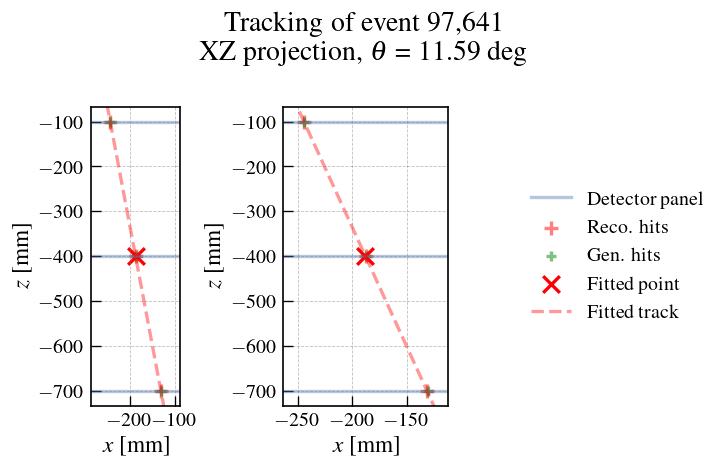

In [10]:
# Choose a random event
import numpy as np
event = np.random.randint(tracking.n_mu)

# Plot tracking
tracking.plot_tracking_event(
    event = event,
    proj="XZ",
    figname="../output_test/Tracking_plot", 
    hits=hits)

In [11]:
f"Muon #{event:,d} direction px, py, pz = {tracking.tracks[event, 0]:.3f}, {tracking.tracks[event, 1]:.3f}, {tracking.tracks[event, 2]:.3f}"

'Muon #97,641 direction px, py, pz = 0.184, 0.079, -0.980'

In [12]:
f"Muon #{event:,d} position x, y, z = {tracking.points[event, 0]:.3f}, {tracking.points[event, 1]:.3f}, {tracking.points[event, 2]:.3f} [mm]"

'Muon #97,641 position x, y, z = -187.827, 66.378, -399.995 [mm]'

### **B - Angles**

From the *tracks* are computed the **muon zenith angle** $\theta$, defined as the angle between the vertical axis and the muon track.

$$
\theta = \pi - atan\left(\frac{\sqrt{px^2 + py^2}}{pz}\right)
$$

A **vertical muon** has $\theta = 0^{\circ} deg$ and a **horizontal muon** has $\theta = 90^{\circ} deg$.

In [13]:
f"Muon #{event} has zenith angle = {tracking.theta[event]:.3f} [rad]"

'Muon #97641 has zenith angle = 0.202 [rad]'

The zenith angle projections in the $XZ$  and $YZ$ ($\theta_x$ and $\theta_y$ respectively) are also computed:

In [14]:
(
    f"Muon #{event} zenith angle XZ projection = {tracking.theta_xy[0, event]:.3f} [rad]",
    f"Muon #{event} zenith angle YZ projection = {tracking.theta_xy[1, event]:.3f} [rad]",
    )

('Muon #97641 zenith angle XZ projection = -0.186 [rad]',
 'Muon #97641 zenith angle YZ projection = -0.081 [rad]')

The **zenith angle** and **energy distributions** can be **plotted** using the `plot_muon_features` function. 

If a file name is provided as `figname`, the **figure** is **saved** as the desired location.

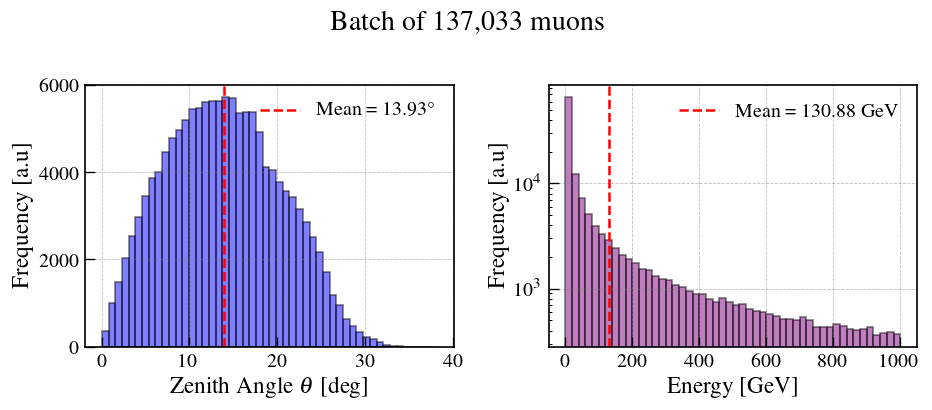

In [15]:
path = "../output_test/"
name = "Energy_theta_plot"
tracking.plot_muon_features(figname=path+name)

## **III - Resolution and efficiency**

### **A - Angular resolution**

The `Tracking` class **computes** the **angular resolution** of the muon batch by comparing the $\theta$ values obtained from the **true** hits (`Hits.gen_hits`) and the **reconstructed** hits (`Hits.reco_hits`).

This process is handled by the `get_angular_error()` method.

First, the **error** on **zenith angle** $\delta\theta$ is computed as:

$$
\delta\theta = \theta_{\mathrm{true}} - \theta_{\mathrm{reco}}
$$

Then , the **angular resolution** $\sigma_\theta$ is computed as the standard deviation of the $\delta\theta$ distribution:

$$
\sigma_\theta = std(\delta\theta)
$$

If `gen_hits` and `reco_hits` are identical, the angular resolution is set to 0.

The **angular error** $\delta\theta$ can be plotted using the `plot_angular_error` function:

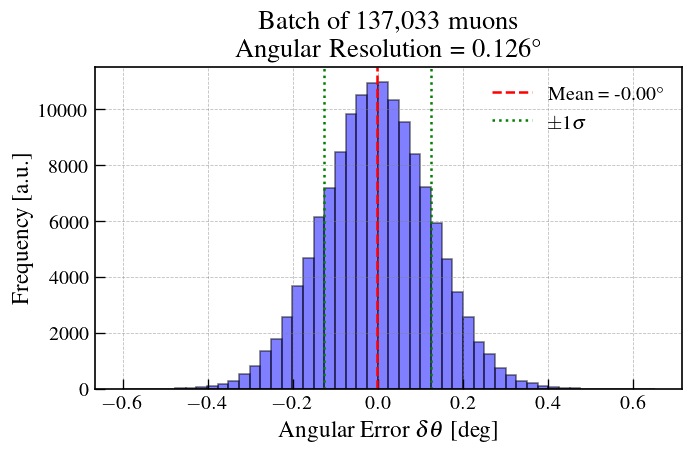

In [16]:
path = "../output_test/"
name = "Angular_error_plot"
tracking.plot_angular_error(figname=path+name)

### **B - Efficiency**

The track efficiency `tracks_eff` is computed from the hits efficiency `Hits.hits_eff`.


 If all hits from a track have `hits_eff`  = 1, `tracks_eff` is set to 1. Else, `tracks_eff` is set to zero.

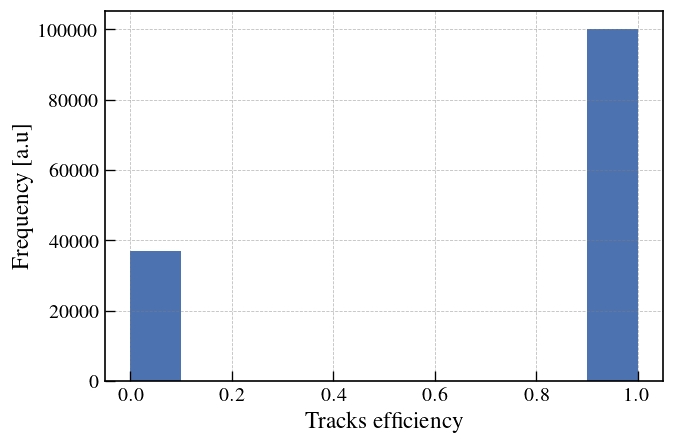

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(tracking.tracks_eff.detach().cpu())
ax.set_xlabel("Tracks efficiency")
ax.set_ylabel("Frequency [a.u]")
plt.show()

Assuming that only events leaving a hit in all detector panels are recorded, the **expected tracking efficiency** $\epsilon_{track}$ depends on the detector panel efficiency $\epsilon_{hits}$ and the number of panels $N_{panels}$:

$$
\epsilon_{track} = \epsilon_{track} ^ {N_{panels}}
$$


The **tracking efficiency** `Tracking.tracking_eff` is defined as the number of recorded tracks over the total number of tracks.

As expected, both efficiencies are matching:

In [18]:
n_detected_tracks = tracking.tracks_eff.sum().detach().cpu().numpy()

expected_tracking_efficiency = hits.efficiency ** hits.n_panels
(
    f"Effective tracking efficiency = {tracking.tracking_eff*100:.2f} %, "
    f"Expected tracking efficiency = {expected_tracking_efficiency*100:.2f} %"
)

'Effective tracking efficiency = 73.04 %, Expected tracking efficiency = 72.90 %'